In [1]:
import pandas as pd
import numpy as np
import time
import datetime
import statistics
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import clear_output

In [10]:
test = np.random.normal(size=20)
np.sqrt(sum((x - np.mean(test)) **2 for x in test) / len(test)), sum(abs(x - np.mean(test)) for x in test)**2 / len(test)

(1.3695710213083327,
 22.295539484537862,
 1.3695710213083327,
 array([ 0.1075692 , -0.20775989, -0.7493917 , -0.02493997, -1.02905034,
         2.73667925,  2.09283808, -0.83966208,  0.62087159, -0.36668433,
        -0.01813129, -1.36915238, -1.27284622, -0.6244232 ,  2.18201307,
        -0.11156757,  2.43750377, -1.47678382,  0.41373598, -2.40678673]))

In [2]:
# intitialize all data
df = pd.read_csv('Results folder\\results day 1 - 3.csv')
df = pd.concat([df, pd.read_csv('Results folder\\results day 4 - 6.csv')])
df = pd.concat([df, pd.read_csv('Results folder\\results day 7 - 9.csv')])
df = pd.concat([df, pd.read_csv('Results folder\\results day 10.csv')])
print(df.shape)

# drop NaN's
df = df[df['fake'].notna()]

# get fake and true news df's
df_fake = df[df.fake == True]
df_true = df[df.fake == False]
df

c:\users\justin\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(635605, 19)


,submissionid,tile,upvotes,upvote_ratio,comments,top_level_comments,crossposts,awards,time_of_post,time_of_request,locked,removed,reason_removed,domain,url,uploader,subreddit,flair,fake
0,g1ogo3,April may prove worst ever month for oil indus...,1,1,0.0,0.0,0.0,0.0,1.586942e+09,1.586942e+09,0.0,0.0,NaN,uk.reuters.com,https://uk.reuters.com/article/uk-iea-oil-biro...,RedditTry12,worldnews,NaN,False
1,g1ofou,Rush To Cash In On Gold As Price Soars: Market...,1,1,0.0,0.0,0.0,0.0,1.586942e+09,1.586942e+09,0.0,0.0,NaN,bangkokpost.com,https://www.bangkokpost.com/business/1900465/r...,Infjuk,worldnews,NaN,False
2,g1ofdl,UK lenders provide 1.1 billion pounds in emerg...,2,1,0.0,0.0,0.0,0.0,1.586942e+09,1.586942e+09,0.0,0.0,NaN,uk.reuters.com,https://uk.reuters.com/article/uk-health-coron...,RedditTry12,worldnews,COVID-19,False
3,g1oenk,China removes vice director of Hong Kong liais...,2,1,0.0,0.0,0.0,0.0,1.586941e+09,1.586942e+09,0.0,0.0,NaN,uk.reuters.com,https://uk.reuters.com/article/uk-hongkong-pro...,RedditTry12,worldnews,Hong Kong,True
4,g1ods2,US to halt funding to WHO over coronavirus,2,1,1.0,1.0,0.0,0.0,1.586941e+09,1.586942e+09,0.0,0.0,NaN,bbc.co.uk,https://www.bbc.co.uk/news/world-us-canada-522...,othamas9,worldnews,COVID-19,False
5,g1ocbu,Germany says WHO is one of best investments af...,3,0.71,0.0,0.0,0.0,0.0,1.586941e+09,1.586942e+09,0.0,0.0,NaN,reuters.com,https://www.reuters.com/article/us-health-coro...,Princess0fPersia,worldnews,Trump,False
6,g1oc7c,China urges United States to fulfill its oblig...,3,0.71,0.0,0.0,0.0,0.0,1.586941e+09,1.586942e+09,0.0,0.0,NaN,reuters.com,https://www.reuters.com/article/us-health-coro...,Princess0fPersia,worldnews,NaN,False
7,g1oc21,China concealed the early coronavirus outbreak...,6,0.88,1.0,1.0,0.0,0.0,1.586941e+09,1.586942e+09,0.0,0.0,NaN,reuters.com,https://www.reuters.com/article/us-health-coro...,Princess0fPersia,worldnews,COVID-19,False
8,g1oban,"UK: PPE could be reused as last resort, says l...",2,1,0.0,0.0,0.0,0.0,1.586941e+09,1.586942e+09,0.0,0.0,NaN,theguardian.com,https://www.theguardian.com/world/2020/apr/15/...,Princess0fPersia,worldnews,NaN,False
9,g1oaj4,Hospital in Ahmedabad splits COVID wards based...,3,0.8,5.0,4.0,0.0,0.0,1.586941e+09,1.586942e+09,0.0,0.0,NaN,indianexpress.com,https://indianexpress.com/article/coronavirus/...,HairLikeWinterFire,worldnews,Govt denied,False


In [3]:
# calculate reach
def max_reach(df):
    
    # get list of unique posts
    subs = list(df.submissionid.unique())
    maxx = []
    
    # loop for every post
    for sub in subs:
        
        # get number of interactions and multiply by ten (1%, 9%, 90% rule)
        comments = list(df[df.submissionid == sub].comments)
        comments = [x * 10 for x in comments]
        
        # add max reach to list
        maxx.append(max(comments))
    
    # return list with max reach
    return maxx


In [4]:
# make a counter of a list
def list_counter(lijst):
    
    # create temporary dict
    temp = {}
    
    # for superusers()
    if type(lijst[0]) != tuple:
        for item in lijst:
            
            # if item is already seen, + 1 its counter
            if item in temp:
                temp[item] += 1
            
            # else creat new counter
            else:
                temp[item] = 1
                
    # for source_concentration()
    else:
        for item in lijst:
            
            # if item is already seen, add its occourences to counter
            if item[0] in temp:
                temp[item[0]] += item[1]
            
            # else make its occurences teh counter
            else:
                temp[item[0]] = item[1]
                
    return temp

In [5]:
# describe max reach of a dataframe
def describe(df1, df2):
    
    # run max_reach() on both df's
    fake_max = (max_reach(df1))
    true_max = (max_reach(df2))
    
    # create a string
    return_string = ''
    
    # add means, mode, median, std, and n to the string
    return_string += f'means: {sum(fake_max) / len(fake_max)}, {sum(true_max) / len(true_max)}\n'
    fake_max.sort()
    true_max.sort()
    return_string += f'mode: {max(set(fake_max), key=fake_max.count)}, {max(set(true_max), key=true_max.count)}\n'
    return_string += f'median: {statistics.median(fake_max)}, {statistics.median(true_max)}\n'
    return_string += f'std: {statistics.stdev(fake_max)}, {statistics.stdev(true_max)}\n'
    return_string += f'N: {len(list(df1.submissionid.unique()))}, {len(list(df2.submissionid.unique()))}'

    # return the string
    return return_string

In [6]:
# calcultae superusers
def superusers(df):
    # get list of unique posts
    unique = list(df.submissionid.unique())

    op = []
    
    # for every posts, extract the username and add to list
    for submission in unique:
        try:
            op.append(list(df_fake[df_fake.submissionid == submission].uploader)[0])
        except:
            continue
    
    # count nr of post by each user, and sort the result
    users = list_counter(op)
    users = sorted(users.items(), key=lambda x: x[1], reverse=True)
    
    # return % of posts uploaded by 1% of top users
    return sum([x[1] for x in users[:len(users) // 100]]) / sum([x[1] for x in users])

In [7]:
# calculate the source concentration
def source_concentration(df):
    
    # get list of unique posts
    unique = list(df.submissionid.unique())

    source = []
    
    # for every post, extract source and reach, and add to list
    for submission in unique:
        try:
            domain = list(df_fake[df_fake.submissionid == submission].domain)[0]
        except:
            continue
        comments = list(df[df.submissionid == submission].comments)
        comments = [x * 10 for x in comments]
        source.append((domain, max(comments)))

    # count reach by each sours, and sort the result
    sources = list_counter(source)
    sources = sorted(sources.items(), key=lambda x: x[1], reverse=True)
    
    # return % of reach by top 5% of sources
    return sum([x[1] for x in sources[:(len(sources) // 100) * 5]]) / sum([x[1] for x in sources])
    

In [8]:
# calculate sharing likelyhood
def sharing_calc(df):
    
    # get list of unique posts
    subs = list(df.submissionid.unique())
    shares = []

    # for every post, extract the number of shares to different subs
    for sub in subs:
        comments = list(df[df.submissionid == sub].crossposts)
        shares.append(max(comments))
    
    # return average nr of shares per posts + std
    return sum(shares) / len(shares), statistics.stdev(shares)

def sharing():
    return sharing_calc(df_fake), sharing_calc(df_true)


In [9]:
# get mod actions
def mods_calc(df):
    
    # get list of unique posts
    posts = list(df.submissionid.unique())
    
    # counters for locked and removed posts
    lock = 0
    remove = 0
    
    # count number of locked and removed posts
    for post in posts:
        locked = list(df[df.submissionid == post].locked)
        if 1 in locked:
            lock += 1
        
        removed = list(df[df.submissionid == post].removed)
        if 1 in removed:
            remove += 1
    
    # return result
    return f'Percent removed: {remove/len(post)}, Percent locked: {lock/len(post)}'
        
        
def mods():
    return f'Fake({mods_calc(df_fake)}), True({mods_calc(df_true)})'  

In [10]:
# get n of upvotes for every post
def ups_calc(df):
    
    # get list of unique posts
    posts = list(df.submissionid.unique())
    
    # get final scores of posts
    scores = [float(list(df[df.submissionid == post].upvotes)[-1]) for post in posts]
    
    # return result
    return sum(scores)/len(scores), statistics.stdev(scores)
    
def ups():
    return f'Fake({ups_calc(df_fake)}), True({ups_calc(df_true)})'

In [11]:
def political(df):
    
    # call describe on political subs and non political subs
    politics = df[df.subreddit.isin(['politics', 'republican', 'democrats', 'conservative'])]
    non_politics = df[df.subreddit.isin(['news', 'worldnews', 'Uplifitingnews', 'coronavirus', 'covid19', 
        'worldevents', 'economics', 'environment', 'europe', 'futurology', 'technology'])]
    return describe(politics, non_politics)
    

In [12]:
def reach_upvotes_calc(df):
    
    # get list of unique posts
    posts = list(df.submissionid.unique())
    reachlist = []
    counter = 0
    
    # for every posts
    for post in posts:
        
        # get upvotes of posts
        ups = list(df[df.submissionid == post].upvotes)
        
        # skip this post if there is not enough data
        if len(ups) < 2:
            counter += 1
            continue
        
        # get time of requests
        times = list(df[df.submissionid == post].time_of_request)
        
        # try to get the point where ups are highest
        try:
            index = ups.index(max(ups))
            
        # else convert ups to all ints
        except TypeError:
            ups = [int(float(x)) for x in ups]
            index = ups.index(max(ups))
            
        # get time difference between first request and hightest ups
        delta = times[index] - times[0]
        
        # if highest amount of upvotes is higher than 1
        if float(max(ups)) > 1.0:
            
            # try to get the n of hours it took to reach its max
            try:
                reachlist.append(max(reach)/(delta/60/60))
            except:
                reachlist.append(max(ups))
        # if highest ups equals 1, reach is 1
        else:
            reachlist.append(1)
    
    print(counter)
    
    # convert everything to an int and return data
    reachlist = [int(float(x)) for x in reachlist]
    return sum(reachlist)/len(reachlist), statistics.stdev(reachlist), len(reachlist)


def reach_upvotes(df1, df2):
    fake = reach_upvotes_calc(df1)
    true = reach_upvotes_calc(df2)
    return f'Mean: {fake[0]}, {true[0]}\nSTD: {fake[1]}, {true[1]}\nN: {fake[2]}, {true[2]}\n'

In [20]:
def box(data1, data2, title1, title2, y):
    
    # set data
    data = {'Nep nieuws' : data1, 
            'Echt nieuws' : data2}
    
    # create plot
    fig, ax = plt.subplots()
    
    # add values to plot and set labels and titles
    ax.boxplot(data.values())
    ax.set_xticklabels(data.keys())
    ax.set_ylabel(y)
    ax.set_title(title1, loc='left')
    
    # show plot
    plt.show()
    
    # set new data
    data = {'Nep nieuws' : data1[:(len(data1) // 10) * 9], 
            'Echt nieuws' : data2[:(len(data2) // 10) * 9]}
    
    # add values to plot and set labels and titles
    fig, ax = plt.subplots()
    ax.boxplot(data.values())
    ax.set_xticklabels(data.keys())
    ax.set_ylabel(y)
    ax.set_title(title2, loc='left')
    plt.show()
    
def containers(data1, data2, title1, title2, x, y):
    
    # get containters for plot
    data1 = get_containers(data1)
    data2 = get_containers(data2)
    
    # convert data to be useable
    totdata1 = sum(data1)
    data1 = [round(x/totdata1*100,2) for x in data1]
    totdata2 = sum(data2)
    data2 = [x/totdata2*100 for x in data2]
    
    # add bars to the plot
    plt.bar(test, data1, width=-40, align='edge', color='orange')
    plt.bar(test, data2, width=40, align='edge', color='blue')
    
    # add legend, labels, title and show plot
    plt.legend(['Nep nieuws', 'Echt nieuws'])
    plt.title(title1, loc='left')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    
    # add bars to new plot with modified data
    plt.bar(test[1:], data1[1:], width=-40, align='edge', color='orange')
    plt.bar(test[1:], data2[1:], width=40, align='edge', color='blue')
    
    # add legend, labels, title and show plot
    plt.legend(['Nep nieuws', 'Echt nieuws'])
    plt.title(title2, loc='left')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    


def reach_data(df1, df2):
    
    # get reach of df's and sort result
    fake = max_reach(df1)
    true = max_reach(df2)
    fake.sort()
    true.sort()
    
    # set title and labels
    title1 = 'Bereik: echt en nep nieuws'
    title2 = 'Bereik: echt en nep nieuws (zonder outliers)'
    y = 'Bereik'
    
    # make boxplots
    box(fake, true, title1, title2, y)
    
    # set title and labels
    title1 = 'Verschil in bereik '
    title2 = 'Verschil in bereik zonder de eerste bar'
    x = 'Bereik'
    y = '% van posts'
    
    # make bar graphs
    containers(fake, true, title1, title2, x, y)

    
def get_containers(test):
    
    # set stepsize and first step
    stepsize = 100
    step = 100
    
    # sava data here
    data = []
    steps = []
    
    # make counter, sort the data, and add first step
    counter = 0
    test.sort()
    steps.append(50)
    
    # for every number in the data
    for number in test:
        
        # check if it is higher or lower than the current step
        # if higher:
        if number > step:
            
            # add counter to data and reset counter
            data.append(counter)
            counter = 1
            
            # loop while until break
            while True:
                
                # set next step size and add it to list
                step += stepsize
                steps.append(step - 50)
                
                # if new number is lower than new step, break
                if number < step:
                    break
                    
                # else add 0 to the counter of new step and repeat
                data.append(0)
                
            # continue to the next number
            continue
        
        # if lower, up counter
        counter += 1
        
    # add last data to counter and return
    data.append(counter)
    return data[:30] + [sum(data[30:])]

    

In [21]:
def get_upvotes(df):
    upvotes = []
    
    # get list of unique posts
    subs = list(df.submissionid.unique())
    
    # get the maximum upvotes a posts has gotten
    for sub in subs:
        ups = list(df[df.submissionid == sub].upvotes)
        ups = [int(float(x)) for x in ups]
        upvotes.append(max(ups))
        
    # return list of max upvotes
    return upvotes

def upvote_data(df_fake, df_true):
    
    # get upvotes for df's, and sort them
    fake = get_upvotes(df_fake)
    true = get_upvotes(df_true)
    fake.sort()
    true.sort()
    
    # set title, labels and make boxplots
    title1 = 'Upvotes'
    title2 = 'Upvotes (zonder outliers)'
    y = 'Upvotes'
    box(fake, true, title1, title2, y)
    
    # set title, labels and make bar graph
    title1 = 'Verschil in upvotes'
    title2 = 'Verschil in upvotes, zonder de eerste bar'
    x = 'Upvotes'
    y = '% van posts'
    containers(fake, true, title1, title2, x, y)
    

In [153]:
print('Upvotes: fake news vs true news\n', ups(), '\n\n')

Upvotes: fake news vs true news
 Fake((497.24962462462463, 3791.9631864952876)), True((815.1243912337662, 5047.821808151476)) 




In [160]:
print('Reach: fake news vs true news\n', describe(df_fake, df_true), '\n\n')

Reach: fake news vs true news
 means: 465.2515015015015, 757.1022727272727
mode: 0.0, 0.0
median: 50.0, 70.0
std: 2767.689524966056, 4059.72600085778
N: 2664, 4928 




In [161]:
print('Superusers: fake news vs true news\n', round(superusers(df_fake), 4), round(superusers(df_true), 4), '\n\n')

Superusers: fake news vs true news
 0.155 0.0 




In [164]:
print('Source concentration: fake news vs true news\n', round(source_concentration(df_fake), 4), round(source_concentration(df_true), 4), '\n\n')

Source concentration: fake news vs true news
 0.6778 0.0 




In [155]:
print('Likelyhood of sharing: fake news vs true news\n', sharing(), '\n\n')

Likelyhood of sharing: fake news vs true news
 ((0.2747747747747748, 1.3370798500076977), (0.33766233766233766, 1.3043252795118516)) 




In [154]:
print('Moderation: fake news vs true news\n', mods(), '\n\n')

Moderation: fake news vs true news
 Fake(Percent removed: 0.0, Percent locked: 0.6666666666666666), True(Percent removed: 0.0, Percent locked: 2.0) 




In [156]:
print('Difference in news types: Political vs non-political\n', political(df_fake), '\n\n')

Difference in news types: Political vs non-political
 means: 534.5754716981132, 664.3427458617332
mode: 10.0, 0.0
median: 160.0, 30.0
std: 1843.963330702684, 4045.683863736237
N: 424, 1027 




In [212]:
print('Time to reach n of people: fake news vs true news\n', reach_upvotes(df_fake, df_true), '\n\n\n\n')

3
5
Time to reach n of people: fake news vs true news
 Mean: 43.72942502818489, 41.42636603696933
STD: 101.58476068666515, 96.56872002601095
N: 2661, 4923
 






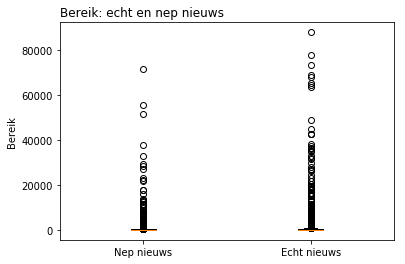

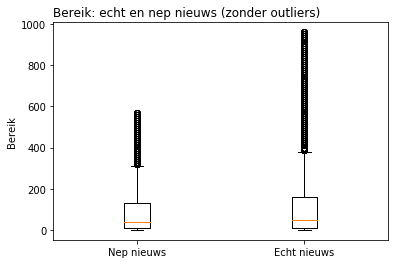

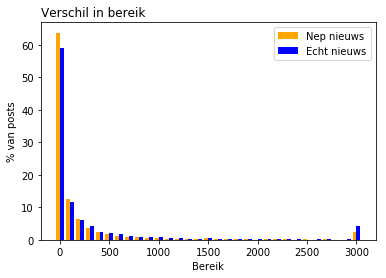

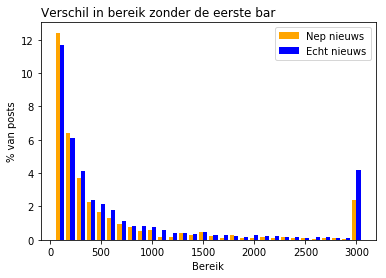

In [22]:
reach_data(df_fake, df_true)

2664 4928


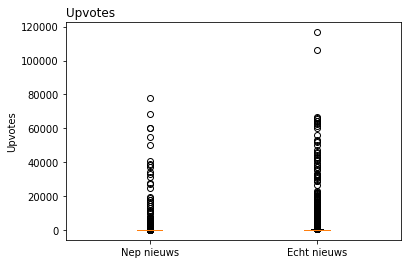

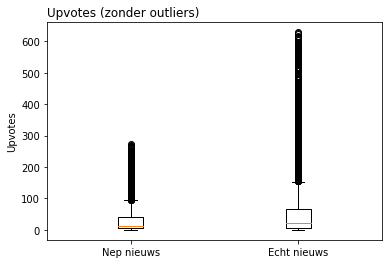

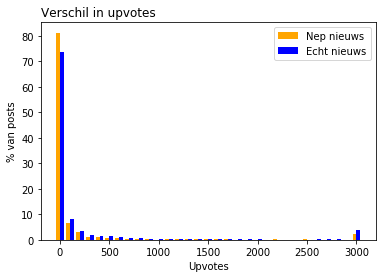

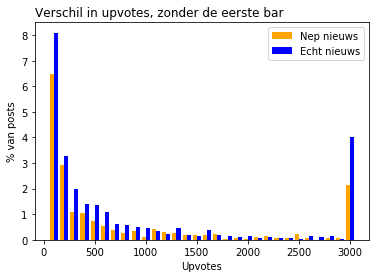

In [23]:
upvote_data(df_fake, df_true)